# Introduction to neural networks classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
# Check out the data
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check out the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


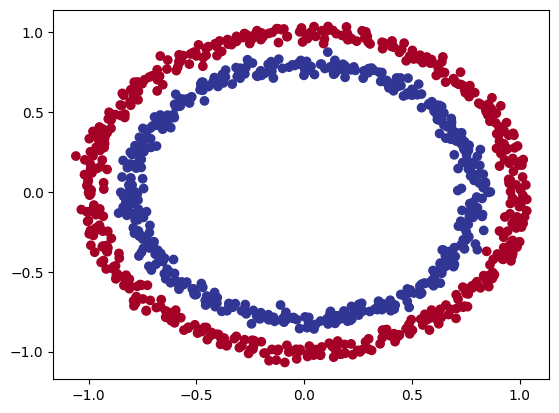

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Input and output shapes

In [6]:
# Check the shapes of X and y
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we're working with?
len(X), len(y)

(1000, 1000)

In [8]:
# View the first sample of features and label
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling
The steps in modelling with TensorFlow are:
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate

In [9]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [10]:
# Create the model
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)), # input shape required
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 5.7365 - accuracy: 0.4963
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 5.7378 - accuracy: 0.4975
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 5.7369 - accuracy: 0.4975
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 5.7360 - accuracy: 0.4975
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 5.7351 - accuracy: 0.4975
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 5.7342 - accuracy: 0.4975
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 5.7120 - accuracy: 0.4975
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 5.6869 - accuracy: 0.4963
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 5.6856 - accuracy: 0.4975
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 5.6963 - accuracy: 0.4975
Epoch 11/

<AxesSubplot: >

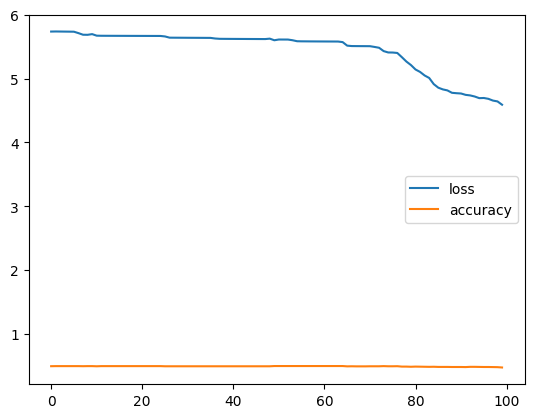

In [11]:
pd.DataFrame(history.history).plot()

In [12]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 5.6579 - accuracy: 0.4150


[5.6579365730285645, 0.41499999165534973]

## Improving our model
Let's look into our bag of tricks and see if we can improve our model.
1. Create a model - we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activation function of each layer.
2. Compiling a model - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. Fitting a model - here we might fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

In [13]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
history_2 = model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 3ms/step - loss: 2.8436 - accuracy: 0.4588
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7077 - accuracy: 0.4975
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6999 - accuracy: 0.5275
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.4888
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.5000
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4837
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6954 - accuracy: 0.5075
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6965 - accuracy: 0.4600
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6951 - accuracy: 0.4863
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6948 - accuracy: 0.4750
Epoch 11/

In [14]:
# Evaluate the model
model_2.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.6979 - accuracy: 0.4300


[0.6979224681854248, 0.4300000071525574]

## Visualizing our model's predictions
To visualize our model predictions, let's create a function `plot_decision_boundary`, this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones where each class falls

In [15]:
import numpy as np
def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    This function was inspired by two resources:
    * [cs231n course](http://cs231n.github.io/neural-networks-case-study/)
    * https://github.com/GokuMohandas/Made-With-ML/blob/main/notebooks/08_Neural_Networks.ipynb
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Create X value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification...")
        # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification...")
        y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classification...


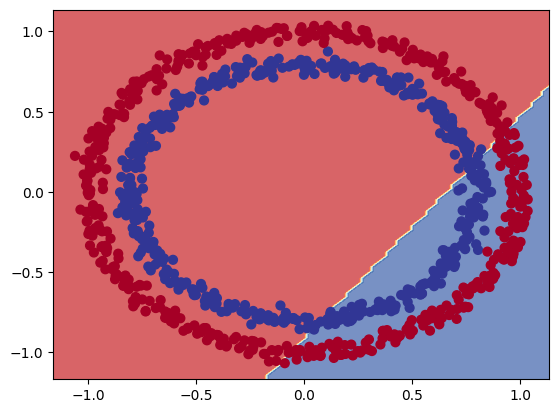

In [16]:
# Check out the decision boundary of our model_2
plot_decision_boundary(model=model_2,
                       X=X,
                       y=y)

In [17]:
model_2.predict(X_test)

7/7 [==============================] - 0s 2ms/step


array([[0.49988982],
       [0.4784169 ],
       [0.48914406],
       [0.50060415],
       [0.50438136],
       [0.50104564],
       [0.47907516],
       [0.509297  ],
       [0.4878618 ],
       [0.49269953],
       [0.49736917],
       [0.47393012],
       [0.47301707],
       [0.4822229 ],
       [0.4802007 ],
       [0.47607413],
       [0.50347996],
       [0.48898885],
       [0.49354872],
       [0.4980349 ],
       [0.49997622],
       [0.47127828],
       [0.48331872],
       [0.4682772 ],
       [0.5041692 ],
       [0.4999102 ],
       [0.49667785],
       [0.47140223],
       [0.49562782],
       [0.48491737],
       [0.4784684 ],
       [0.47531602],
       [0.5092699 ],
       [0.47281823],
       [0.47770384],
       [0.5042764 ],
       [0.4753391 ],
       [0.5042848 ],
       [0.47896093],
       [0.4670033 ],
       [0.5065287 ],
       [0.50381374],
       [0.50346607],
       [0.48165622],
       [0.47607175],
       [0.49872568],
       [0.47182348],
       [0.475

In [18]:
# Set random seed
tf.random.set_seed(42)

X_regression = tf.expand_dims(tf.range(0, 1000, 5), axis=1).numpy()
y_regression = tf.squeeze(X_regression + 10).numpy()

X_regression, y_regression

(array([[  0],
        [  5],
        [ 10],
        [ 15],
        [ 20],
        [ 25],
        [ 30],
        [ 35],
        [ 40],
        [ 45],
        [ 50],
        [ 55],
        [ 60],
        [ 65],
        [ 70],
        [ 75],
        [ 80],
        [ 85],
        [ 90],
        [ 95],
        [100],
        [105],
        [110],
        [115],
        [120],
        [125],
        [130],
        [135],
        [140],
        [145],
        [150],
        [155],
        [160],
        [165],
        [170],
        [175],
        [180],
        [185],
        [190],
        [195],
        [200],
        [205],
        [210],
        [215],
        [220],
        [225],
        [230],
        [235],
        [240],
        [245],
        [250],
        [255],
        [260],
        [265],
        [270],
        [275],
        [280],
        [285],
        [290],
        [295],
        [300],
        [305],
        [310],
        [315],
        [320],
        [325],
        [3

In [19]:
X_regression_train, X_regression_test, y_regression_train, y_regression_test = train_test_split(X_regression, y_regression, test_size=0.2)
X_regression_train.shape, y_regression_train.shape, X_regression_test.shape, y_regression_test.shape

((160, 1), (160,), (40, 1), (40,))

In [20]:
# fit model 2
model_2.fit(X_regression_train, y_regression_train, epochs=100)

Epoch 1/100


ValueError: in user code:

    File "C:\Users\snick\miniconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\snick\miniconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\snick\miniconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\snick\miniconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\snick\miniconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\snick\miniconda3\envs\tf\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_1" "                 f"(type Sequential).
    
    Input 0 of layer "dense_2" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (32, 1)
    
    Call arguments received by layer "sequential_1" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 1), dtype=int32)
      • training=True
      • mask=None


Oh wait... we compiled our model for binary classification, not regression. Let's fix that.

In [21]:
# Creat a regression model
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# Compile the model, this time with a regression loss function
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_3.fit(X_regression_train, y_regression_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 250.4693 - mae: 250.4693
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 71.6209 - mae: 71.6209
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 50.0506 - mae: 50.0506
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 27.6134 - mae: 27.6134
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 17.5838 - mae: 17.5838
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 9.9126 - mae: 9.9126
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 7.0303 - mae: 7.0303
Epoch 8/100
5/5 [==============================] - 0s 6ms/step - loss: 6.4143 - mae: 6.4143
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 6.1623 - mae: 6.1623
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 4.9009 - mae: 4.9009
Epoch 11/100
5/5 [==============================] - 0s 5ms/step - l

In [22]:
# Evaluate the regression model
model_3.evaluate(X_regression_test, y_regression_test)

2/2 [==============================] - 0s 6ms/step - loss: 5.2010 - mae: 5.2010


[5.201005458831787, 5.201005458831787]

2/2 [==============================] - 0s 2ms/step


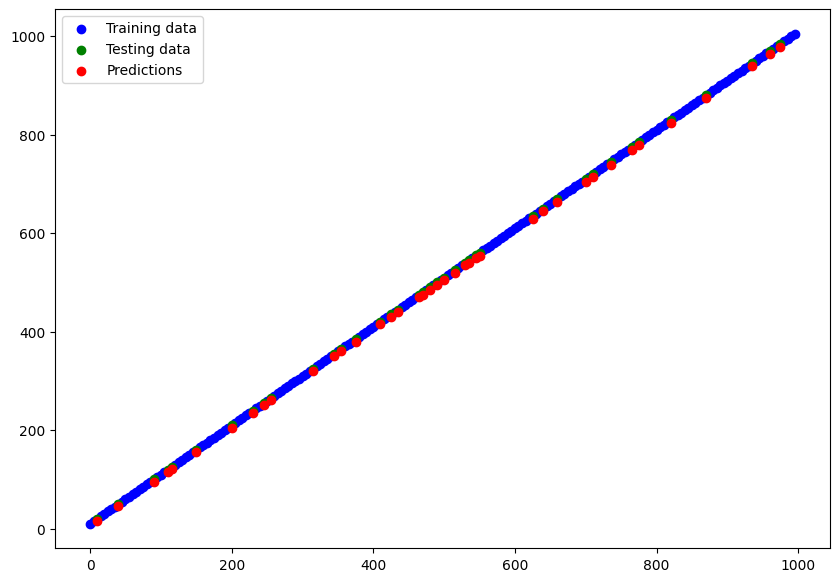

In [23]:
# Make some predictions
y_regression_preds = model_3.predict(X_regression_test)

# Plot predictions against ground truth labels
plt.figure(figsize=(10, 7))
plt.scatter(X_regression_train, y_regression_train, c="b", label="Training data")
plt.scatter(X_regression_test, y_regression_test, c="g", label="Testing data")
plt.scatter(X_regression_test, y_regression_preds, c="r", label="Predictions")
plt.legend()


# The missing piece: Non-linearity

In [56]:
# Create model with non-linearity
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)), # input shape required
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_4 = model_4.fit(X_train, y_train, epochs=350)

Epoch 1/350
25/25 [==============================] - 1s 4ms/step - loss: 0.7722 - accuracy: 0.4600
Epoch 2/350
25/25 [==============================] - 0s 4ms/step - loss: 0.7501 - accuracy: 0.4688
Epoch 3/350
25/25 [==============================] - 0s 3ms/step - loss: 0.7351 - accuracy: 0.4825
Epoch 4/350
25/25 [==============================] - 0s 3ms/step - loss: 0.7247 - accuracy: 0.4800
Epoch 5/350
25/25 [==============================] - 0s 3ms/step - loss: 0.7174 - accuracy: 0.4825
Epoch 6/350
25/25 [==============================] - 0s 3ms/step - loss: 0.7120 - accuracy: 0.4837
Epoch 7/350
25/25 [==============================] - 0s 3ms/step - loss: 0.7085 - accuracy: 0.4787
Epoch 8/350
25/25 [==============================] - 0s 3ms/step - loss: 0.7058 - accuracy: 0.4688
Epoch 9/350
25/25 [==============================] - 0s 3ms/step - loss: 0.7035 - accuracy: 0.4625
Epoch 10/350
25/25 [==============================] - 0s 3ms/step - loss: 0.7020 - accuracy: 0.4512
Epoch 11/

In [57]:
model_4.evaluate(X_test, y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.1086 - accuracy: 0.9850


[0.10857909917831421, 0.9850000143051147]

313/313 [==============================] - 1s 2ms/step
doing binary classification...


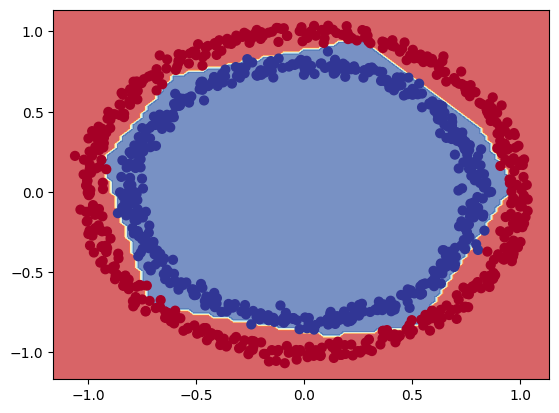

In [59]:
# Plot the decision boundary
plot_decision_boundary(model_4, X, y)

<AxesSubplot: >

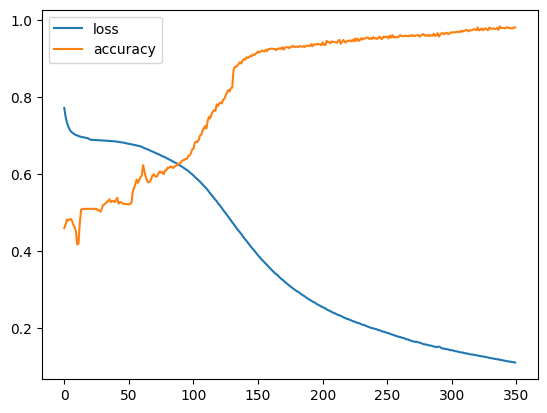

In [60]:
pd.DataFrame(history_4.history).plot()

In [61]:
# Create a toy tensor (similar to the data we pass in to our models)
A = tf.cast(tf.range(-10, 10), dtype=tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

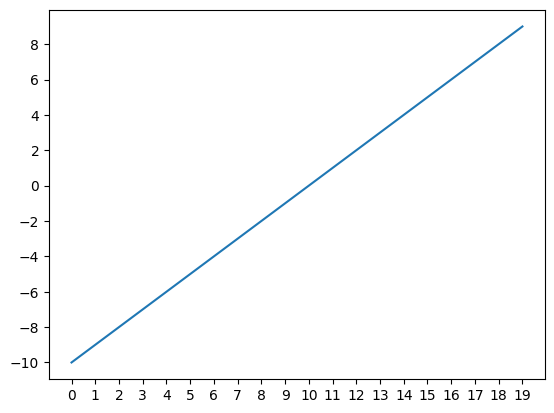

In [70]:
plt.xticks(tf.range(0, 20))
plt.yticks(tf.range(-10, 10, 2))
plt.plot(A)

In [73]:
# Let try to replicate the sigmoid function
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

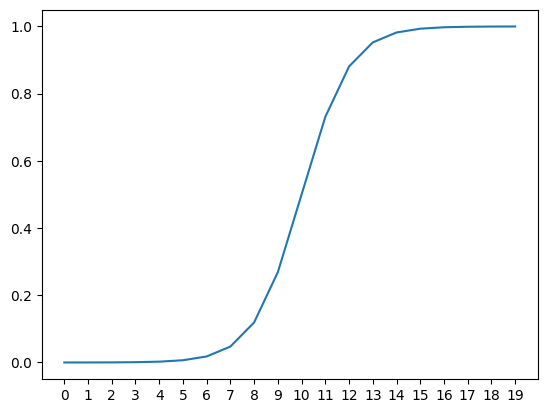

In [75]:
# Plot our toy tensor transformed by the sigmoid function
plt.xticks(tf.range(0, 20))
plt.plot(sigmoid(A))

In [76]:
def relu(x):
    return tf.maximum(0, x)

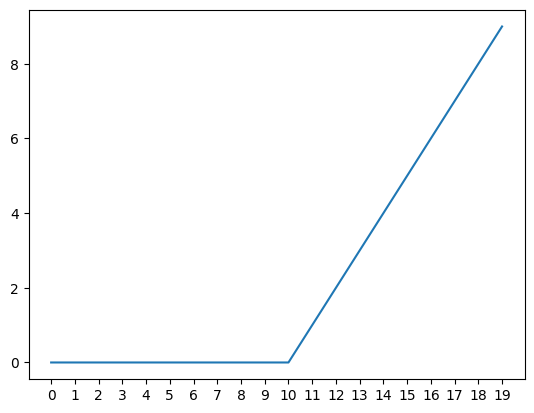

In [77]:
# Plot our toy tensor transformed by the relu function
plt.xticks(tf.range(0, 20))
plt.plot(relu(A))